In [1]:
import IPython
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import librosa

/var/folders/30/l0wngnb94zn7v2w3gg2pjbr80000gn/T/ipykernel_35548/2604146997.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wavfile.read("sound/audiotest.wav")


Sampling Rate: 16000 Hz
Audio Duration: 9 seconds


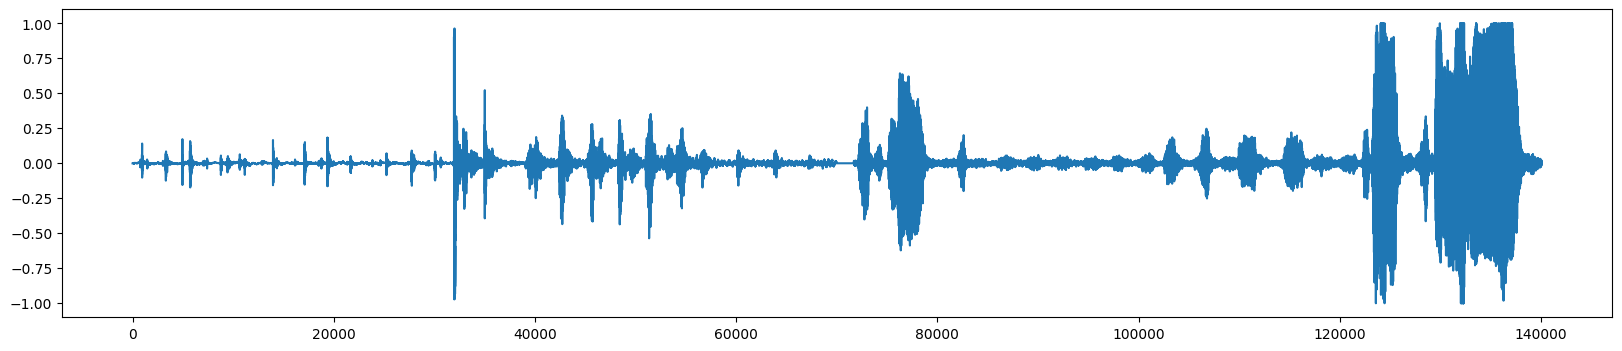

In [2]:
rate, data = wavfile.read("sound/audiotest.wav")

data = data / np.max(np.abs(data))       # normalize audio  
timesDuration = librosa.get_duration(y=data, sr=rate)

print(f'Sampling Rate: {rate} Hz')
print(f'Audio Duration: {timesDuration:.0f} seconds')

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(data)

In [3]:
# Simmulation Noise function
def fftnoise(f):
    f = np.array(f, dtype="complex")
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1 : Np + 1] *= phases
    f[-1 : -1 - Np : -1] = np.conj(f[1 : Np + 1])
    
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1 / samplerate))
    f = np.zeros(samples)
    f[np.logical_and(freqs >= min_freq, freqs <= max_freq)] = 1
    
    return fftnoise(f) 

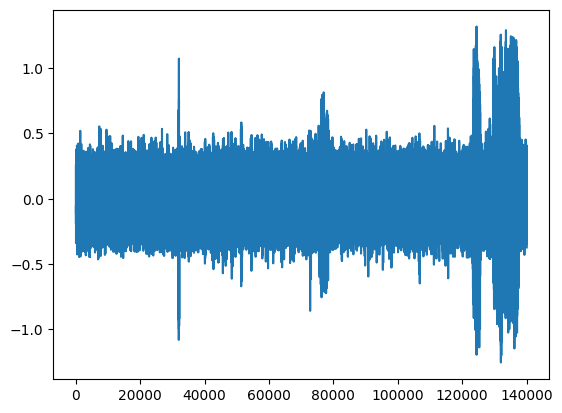

In [4]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=50, max_freq = 12000, samples=len(data), samplerate=rate)*50
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

plt.figsize=(20,4)
plt.plot(audio_clip_band_limited)
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

/Users/panya/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


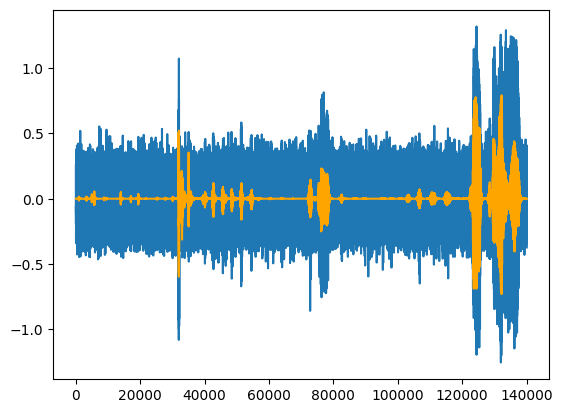

In [5]:
import noisereduce as nr

# perform noise reduction
#reduced_noise = nr.reduce_noise(y=data, sr=rate)
reduced_noise = nr.reduce_noise(y=data, sr=rate, stationary=True, prop_decrease=1,n_std_thresh_stationary=1.5,time_constant_s=0.5,freq_mask_smooth_hz=1500)    # ,use_torch=True )


plt.figsize=(20,4)
plt.plot(audio_clip_band_limited)
plt.plot(reduced_noise,'orange')

IPython.display.Audio(data=reduced_noise, rate=rate)